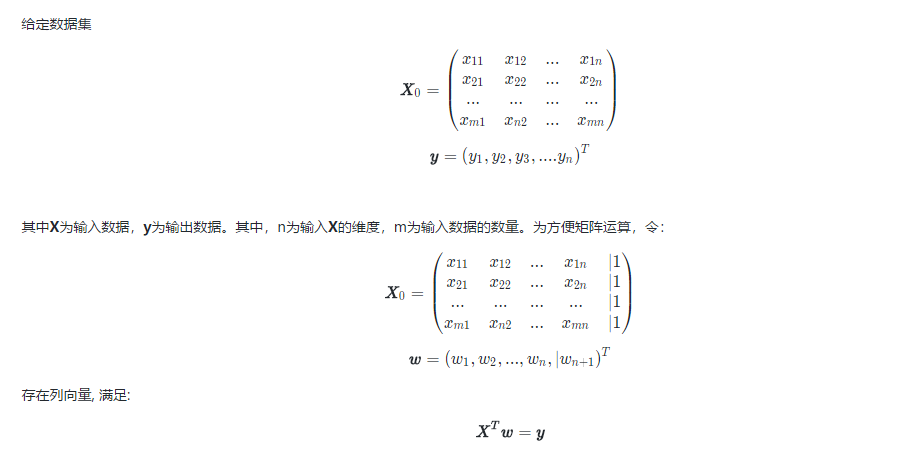

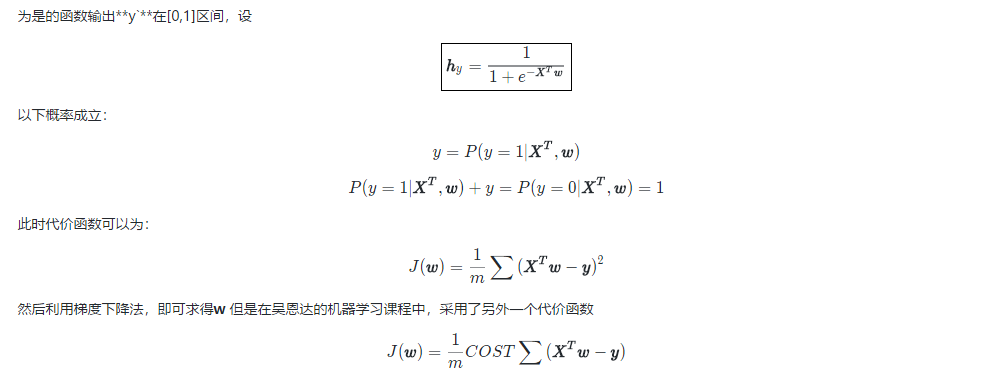

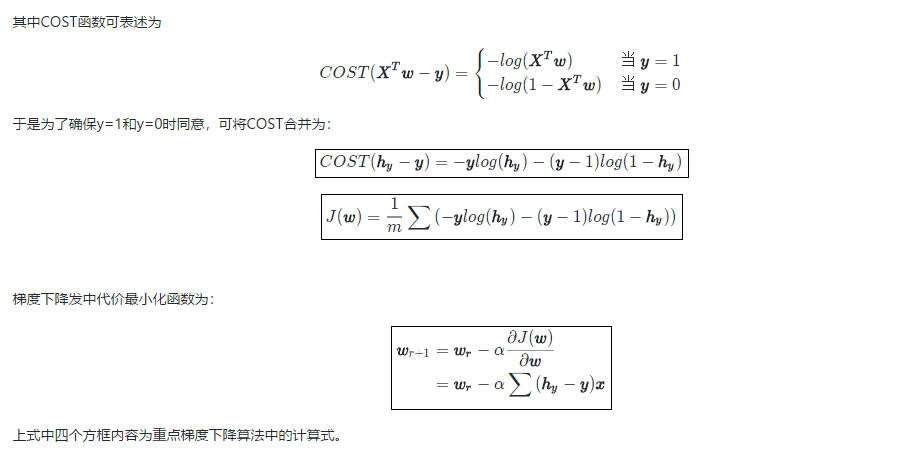

## 二分类
给定数据集 :<br>
$$X_{in} =\begin{pmatrix}
    x_{11}&x_{12}&x_{13}&...&x_{1n} \\ 
    x_{21}&x_{22}&x_{23}&...&x_{2n} \\ 
    ...&...&...&...&...\\ 
    x_{m1}&x_{m2}&x_{m3}&...&x_{mn} \\ 
\end{pmatrix} \\ 
y = (y_1,y_2,y_3,...,y_n)^T
$$
其中：<br>
$X$ 为输入数据<br>
$y$ 为输出数据<br>
$n$ 为输入数据维度<br>
$m$ 为样本数量<br>
为提高效率，现使用矩阵语言讨论，令：<br>
$$X = \begin{pmatrix}
    x_{11}&x_{12}&x_{13}&...&x_{1n}&| 1 \\ 
    x_{21}&x_{22}&x_{23}&...&x_{2n}&| 1 \\ 
    ...&...&...&...&...&| 1 \\  
    x_{m1}&x_{m2}&x_{m3}&...&x_{mn}&| 1 \\ 
\end{pmatrix} \\ 
$$
存在 $  w = (w_1,w_2,w_3,...,w_n | w_{n+1})^T $, 满足 $X^Tw = y$。$w$确定后，整个回归系统就确定了。为使输出函数$y\in [0,1]$，引入sigmiod函数$H$：
$$H(x)=\frac{1}{1+e^{x}} \\
即 \\
\boxed{H_w(X)=\frac{1}{1+e^{-X^Tw}}}
$$
则以下概率公式成立：
$$
y_0 = P(y=0|X^T,w) \  , \ y_1 = P(y=1|X^T,w) \\ 
y_0 + y_1 = 1
$$
代价函数一般可表述如下，通过**梯度下降法**即可计算出$w$
$$
J(w) = \frac{1}{m}\sum{(H_w-y)^2}
$$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

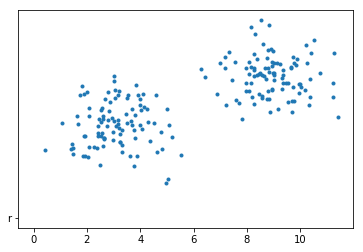

In [121]:
x1 = np.random.normal((3,4),1,(100,2))
y1 = np.ones(100).reshape(100,1)
x1 = np.column_stack((x1,y1))
x2 = np.random.normal((9,6),1,(100,2))
y2 = np.zeros(100).reshape(100,1)
x2 = np.column_stack((x2,y2))
x = np.row_stack((x1,x2))
np.random.shuffle(x)
plt.plot(x[:,0],x[:,1],'.','r')

In [122]:
d = x.shape[1]-1           #  d 表示数据维度
y = np.mat(x[:,-1]).copy().T    #  y 表示数据集中，输出数据
X = np.mat(x).copy()            #  x 表示数据集中，输入数据
X[:,-1] = 1
w0 = np.mat(np.ones(3)-0.5).reshape(3,1)
X.shape , y.shape,  w0.shape

((200, 3), (200, 1), (3, 1))

In [202]:
def GradDesc(gX,gy,gw,alpha=1e-2):
    xtw = gX * gw   #(200,1)
    h = 1 / (1 + np.exp(-xtw))
    cost1 = - gy.T * np.log(h)  #(1,200)*(200,1) = (1)    
    cost2 = - (gy.T - 1) * np.log(1 - h) #(1,200)*(200,1) = (1)    
    m = len(gy)
    J0= (cost1 + cost2) / m
    GD = ((h - y).T * x).T   #(200,1).T * (200,3) = (1,3), 在取T后为 (3,1)
    r_w = gw - alpha * GD
    xtw1 = gX * r_w
    h1 = 1 / (1 + np.exp( -xtw1 ))
    J = (- gy.T * np.log(h1) - (gy.T - 1) * np.log(1 - h1)) / m
    #print('****',J,'****',r_w.T,'****')
    return J,r_w

In [203]:
JJ,ww = GradDesc(X,y,w0)
list_jj = []
list_jj.append(JJ)
ii = 0
while True:
    JJ,ww = GradDesc(X,y,ww)
    list_jj.append(JJ)   
    if np.abs(JJ)<=1e-5 : break



In [204]:
#plt.plot(x[:,0],x[:,1],'.','r')
r_h = 1 / (1 + np.exp(x * ww))
r_y = np.where(r_h<=0.5 , 1,0)
test = np.abs(r_y - y)
test.sum()/len(x)

0.005

# 对率回归的多分类

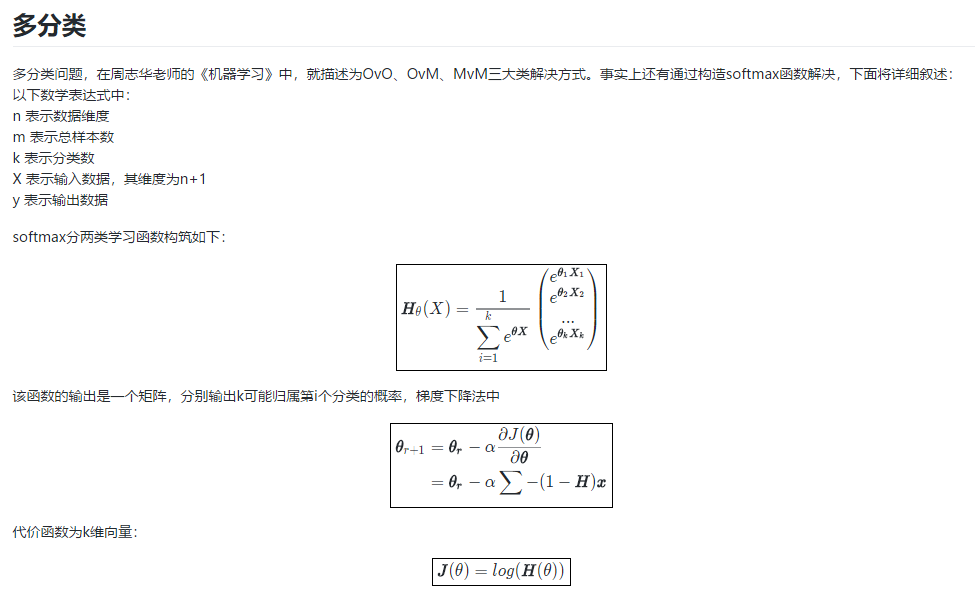